# Evn

In [ ]:
# imports
import argparse
import os
import random
import shutil
import json
import zipfile
import math
import copy
import collections
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import sentencepiece as spm
import tensorflow as tf
import tensorflow.keras.backend as K

from tqdm.notebook import tqdm, trange

In [ ]:
# 환경 설정
args = {
    # random seed value
    "seed": 1234
}
args = argparse.Namespace(**args)

print(args)

Namespace(seed=1234)


In [ ]:
# random seed 설정
random.seed(args.seed)
np.random.seed(args.seed)
tf.random.set_seed(args.seed)

In [ ]:
# gpu 사용량 확인
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



- element wise sum

In [ ]:
A = np.random.randint(-9,10,(5,4))/10
print(A)

[[-0.2  0.2 -0.9  0. ]
 [ 0.2  0.7 -0.6 -0.7]
 [ 0.3 -0.8  0.2  0.2]
 [ 0.8  0.5 -0.2  0.1]
 [ 0.2  0.5  0.8  0.4]]


In [ ]:
B = np.random.randint(-9,10,(5,4))/10
print(B)

[[-0.9  0.3 -0.4  0.8]
 [-0.4  0.4  0.7  0. ]
 [-0.1  0.3 -0.3  0.3]
 [ 0.6  0.8  0.9  0.5]
 [-0.7 -0.4  0.4 -0.3]]


In [ ]:
A+B

array([[-1.1,  0.5, -1.3,  0.8],
       [-0.2,  1.1,  0.1, -0.7],
       [ 0.2, -0.5, -0.1,  0.5],
       [ 1.4,  1.3,  0.7,  0.6],
       [-0.5,  0.1,  1.2,  0.1]])

- 브로드 케스트

In [ ]:
B = np.random.randint(-9,10,(5,1))/10
B , A +B

(array([[ 0.9],
        [ 0.8],
        [-0.2],
        [-0.5],
        [-0.2]]), array([[ 0.7,  1.1,  0. ,  0.9],
        [ 1. ,  1.5,  0.2,  0.1],
        [ 0.1, -1. ,  0. ,  0. ],
        [ 0.3,  0. , -0.7, -0.4],
        [ 0. ,  0.3,  0.6,  0.2]]))

- element wise product

In [ ]:
A = np.random.randint(-9,10,(5,4))/10
B = np.random.randint(-9,10,(5,4))/10
A*B

array([[-0.08,  0.63,  0.  ,  0.18],
       [-0.  , -0.72,  0.3 ,  0.36],
       [ 0.15, -0.  , -0.2 ,  0.72],
       [-0.05,  0.35, -0.36,  0.06],
       [ 0.27,  0.24, -0.  ,  0.48]])

In [ ]:
# 브로드 케스트

B = np.random.randint(-9,10,(5,1))/10
print(A*B)

B = np.random.randint(-9,10,(1,4))/10
print(A*B)

[[ 0.56 -0.63  0.    0.63]
 [-0.    0.72 -0.45  0.54]
 [ 0.24  0.    0.32 -0.72]
 [ 0.45  0.45  0.81  0.09]
 [ 0.24  0.64  0.    0.48]]
[[ 0.    0.54 -0.   -0.72]
 [ 0.    0.48 -0.25  0.48]
 [ 0.   -0.   -0.2   0.72]
 [-0.    0.3   0.45  0.08]
 [ 0.   -0.48 -0.   -0.48]]


In [ ]:
A = np.random.randint(-9,10,(5,4))/10
B = np.random.randint(-9,10,(4,3))/10

np.matmul(A,B)

array([[-0.53,  0.02,  0.69],
       [-0.28,  0.83,  0.03],
       [-0.02,  0.01,  0.51],
       [-0.24, -0.24,  0.36],
       [ 0.11, -0.6 ,  0.51]])

In [ ]:
#직접계산
result = np.zeros((A.shape[0], B.shape[-1]))
for row in range(A.shape[0]):
    for col in range(B.shape[-1]):
        result[row][col] = np.dot(A[row], B[:,col])

result

array([[-0.53,  0.02,  0.69],
       [-0.28,  0.83,  0.03],
       [-0.02,  0.01,  0.51],
       [-0.24, -0.24,  0.36],
       [ 0.11, -0.6 ,  0.51]])

- dot product

In [ ]:
# a,b, 백터 선언
A = np.random.randint(-9,10,(5,))/10
B = np.random.randint(-9,10,(5,))/10

In [ ]:
print(A)
print(B)

[ 0.2 -0.7 -0.1 -0.8  0.5]
[-0.5  0.1 -0.6  0.8  0.6]


In [ ]:
np.dot(A,B)

-0.4500000000000001

In [ ]:
c = A*B
c

array([-0.1 , -0.07,  0.06, -0.64,  0.3 ])

In [ ]:
np.sum(c)

-0.4500000000000001

# monte carlo method

In [ ]:
x = np.linspace(0,1,100)
x

In [ ]:
y = np.sqrt(1- np.square(x))
y

In [ ]:
# check
np.square(x) + np.square(y)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

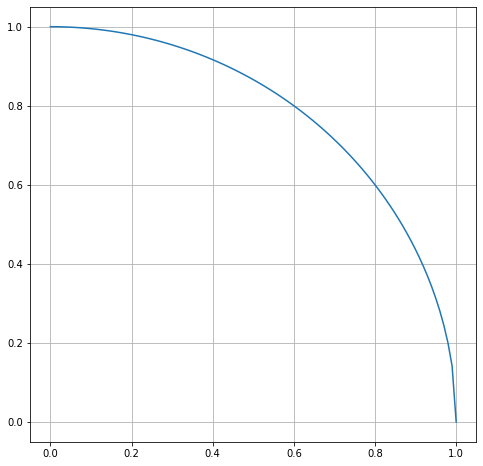

In [ ]:
# chart
plt.figure(figsize = (8,8))
plt.plot(x,y)
plt.grid()
plt.show()

In [ ]:
# 정답
y_true = np.pi / 4
y_true

0.7853981633974483

In [ ]:
# 10개 random sample
samples = np.random.rand(10,2)
samples

array([[0.84993003, 0.96045829],
       [0.38111827, 0.3309362 ],
       [0.26092345, 0.66549109],
       [0.18179543, 0.37679994],
       [0.01425856, 0.3391353 ],
       [0.4013514 , 0.46757367],
       [0.6521055 , 0.99719214],
       [0.51746228, 0.40361156],
       [0.05844676, 0.04519571],
       [0.62708044, 0.00806841]])

In [ ]:
np.square(samples)

array([[7.22381052e-01, 9.22480133e-01],
       [1.45251138e-01, 1.09518770e-01],
       [6.80810486e-02, 4.42878388e-01],
       [3.30495789e-02, 1.41978194e-01],
       [2.03306615e-04, 1.15012753e-01],
       [1.61082949e-01, 2.18625134e-01],
       [4.25241584e-01, 9.94392172e-01],
       [2.67767214e-01, 1.62902288e-01],
       [3.41602417e-03, 2.04265223e-03],
       [3.93229883e-01, 6.50992678e-05]])

In [ ]:
length = np.sqrt(np.sum(np.square(samples), axis = -1))
length

# 루트(x^2 + y^2) = 길이

array([1.28252142, 0.50474737, 0.71481427, 0.41836321, 0.33943491,
       0.61620458, 1.19148385, 0.65625414, 0.07388286, 0.62713235])

In [ ]:
error = []

In [ ]:
y_pred = np.sum(length < 1) / len(length)
error.append(y_true- y_pred)
y_pred


0.8

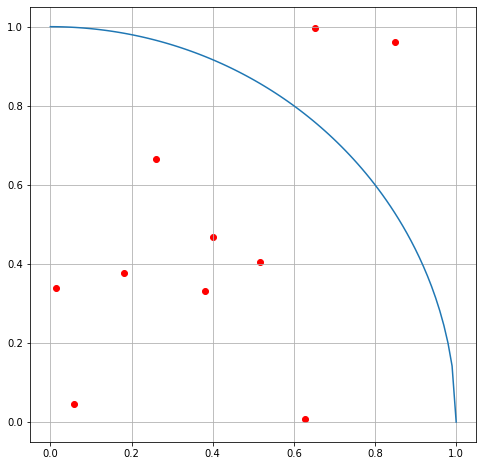

In [ ]:
#chart
plt.figure(figsize = (8,8))
plt.plot(x,y)
for sample in samples:
    plt.scatter(sample[0], sample[1], color = 'r')
plt.grid()
plt.show()

In [ ]:
def monta(n_samples):
    samples = np.random.rand(n_samples,2)
    length = np.sqrt(np.sum(np.square(samples), axis = -1))
    y_pred = np.sum(length < 1) / len(length)

    plt.figure(figsize = (8,8))
    plt.plot(x,y)
    for sample in samples:
        plt.scatter(sample[0], sample[1], color = 'r')
    plt.grid()
    plt.show()
    
    return y_pred

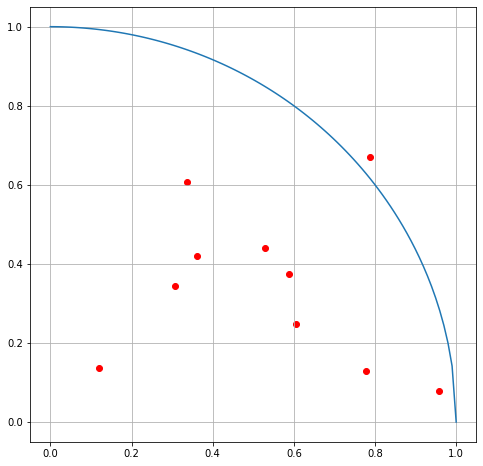

In [ ]:
error = []
y_pred = monta(10)

error.append(y_pred)

In [ ]:
error

[0.9]

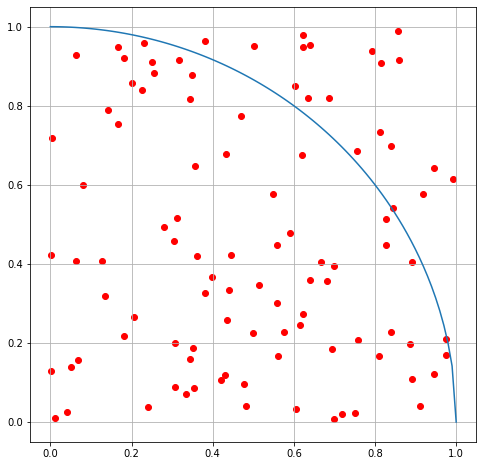

In [ ]:
# error = []
y_pred = monta(100)
error.append(y_pred)

In [ ]:
error

[0.9, 0.81]

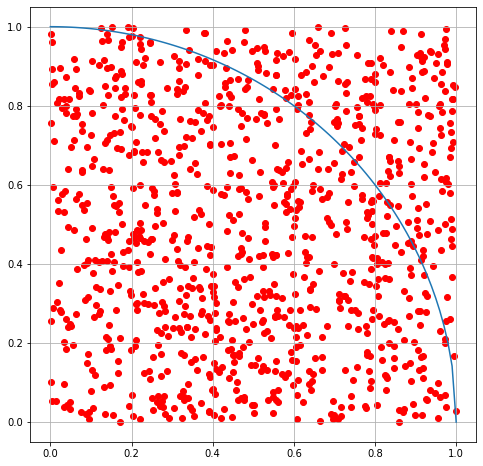

In [ ]:
error = []
y_pred = monta(1000)
error.append(y_pred)

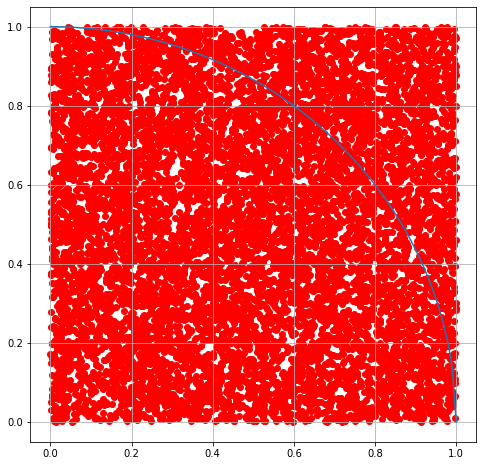

In [ ]:
error = []
y_pred = monta(10000)
error.append(y_pred)

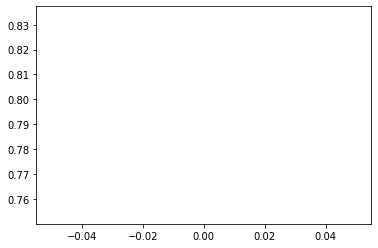

In [ ]:
plt.plot(error)
plt.show()